Title of Final Project: Heart Failure Predictions

Section: 52745

Group Number: 14

Student: Vaishnavi Sathiyamoorthy

UT EID: vs25229

Student: Medha Nalamada

UT EID: mrn789

Student: Alex Hohmann

UT EID: ajh5399

Student: Saivachan Ponnapolli

UT EID: sp48347

Date: 11/06/2023

# Goal
Cardiovascular disease is the leading cause of death around the world. If we are able to predict whether an individual will have cardiovascular disease, it can save numerous lives. This dataset consists of 11 factors that potentially predicts heart failure: age, sex, chest pain type, resting blood pressure, cholesterol, fasting blood sugar, resting ECG, maximum heart rate, exercise induced angina, old peak, and the slope of peak exercise. Using statistics and machine learning, this project aims to determine if these factors can predict whether an individual will have cardiovascular disease.

In [8]:
import pandas as pd
# !pip install altair==5.1.2
# !pip install fastapi kaleido python-multipart uvicorn
# !pip install --upgrade lida
import altair as alt
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv("heart.csv")

df = df.drop(['Cholesterol'],axis=1)
df = df[df['RestingBP']!=0]

To begin our visualization, we initially explored the distribution of heart disease against numerous variables in our dataset. In addition, we also built a correlation matrix to identify variables of interest. Overall, these two graphs will help us understand the nature of our dataset and will support our exploratory data analysis to help identify what will predict heart disease the best

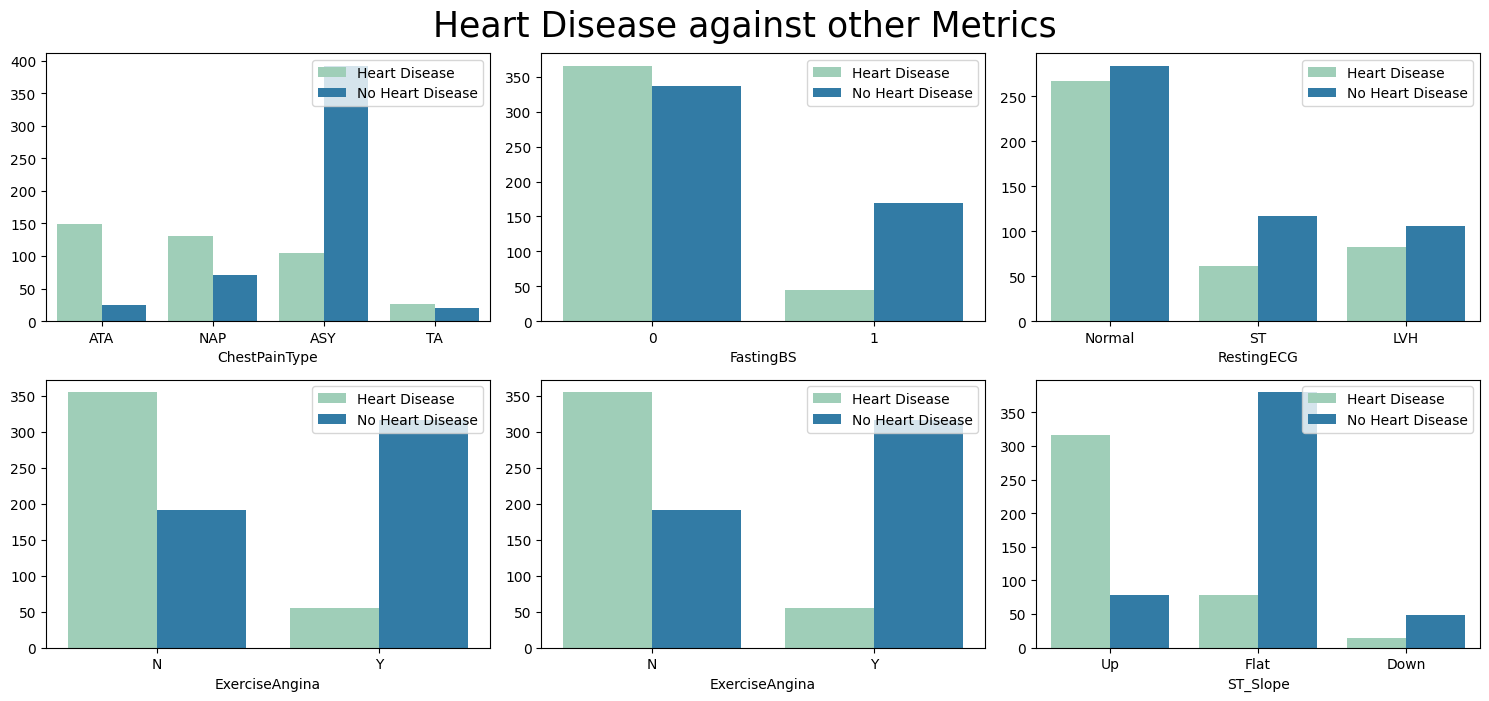

In [9]:
countfeature = ["ChestPainType", "FastingBS", "RestingECG", "ExerciseAngina", "ExerciseAngina", "ST_Slope"]
countlist = list(enumerate(countfeature))

plt.figure(figsize = (15,10))
plt.suptitle("Heart Disease against other Metrics", fontsize=25,color='black')
for i in countlist:
    plt.subplot(3,3,i[0]+1)
    sns.countplot(data = df, x = i[1], hue = "HeartDisease", palette="YlGnBu")
    plt.ylabel("")
    plt.legend(['Heart Disease', 'No Heart Disease'], loc='upper right', prop={'size': 10})
plt.tight_layout()
plt.show()

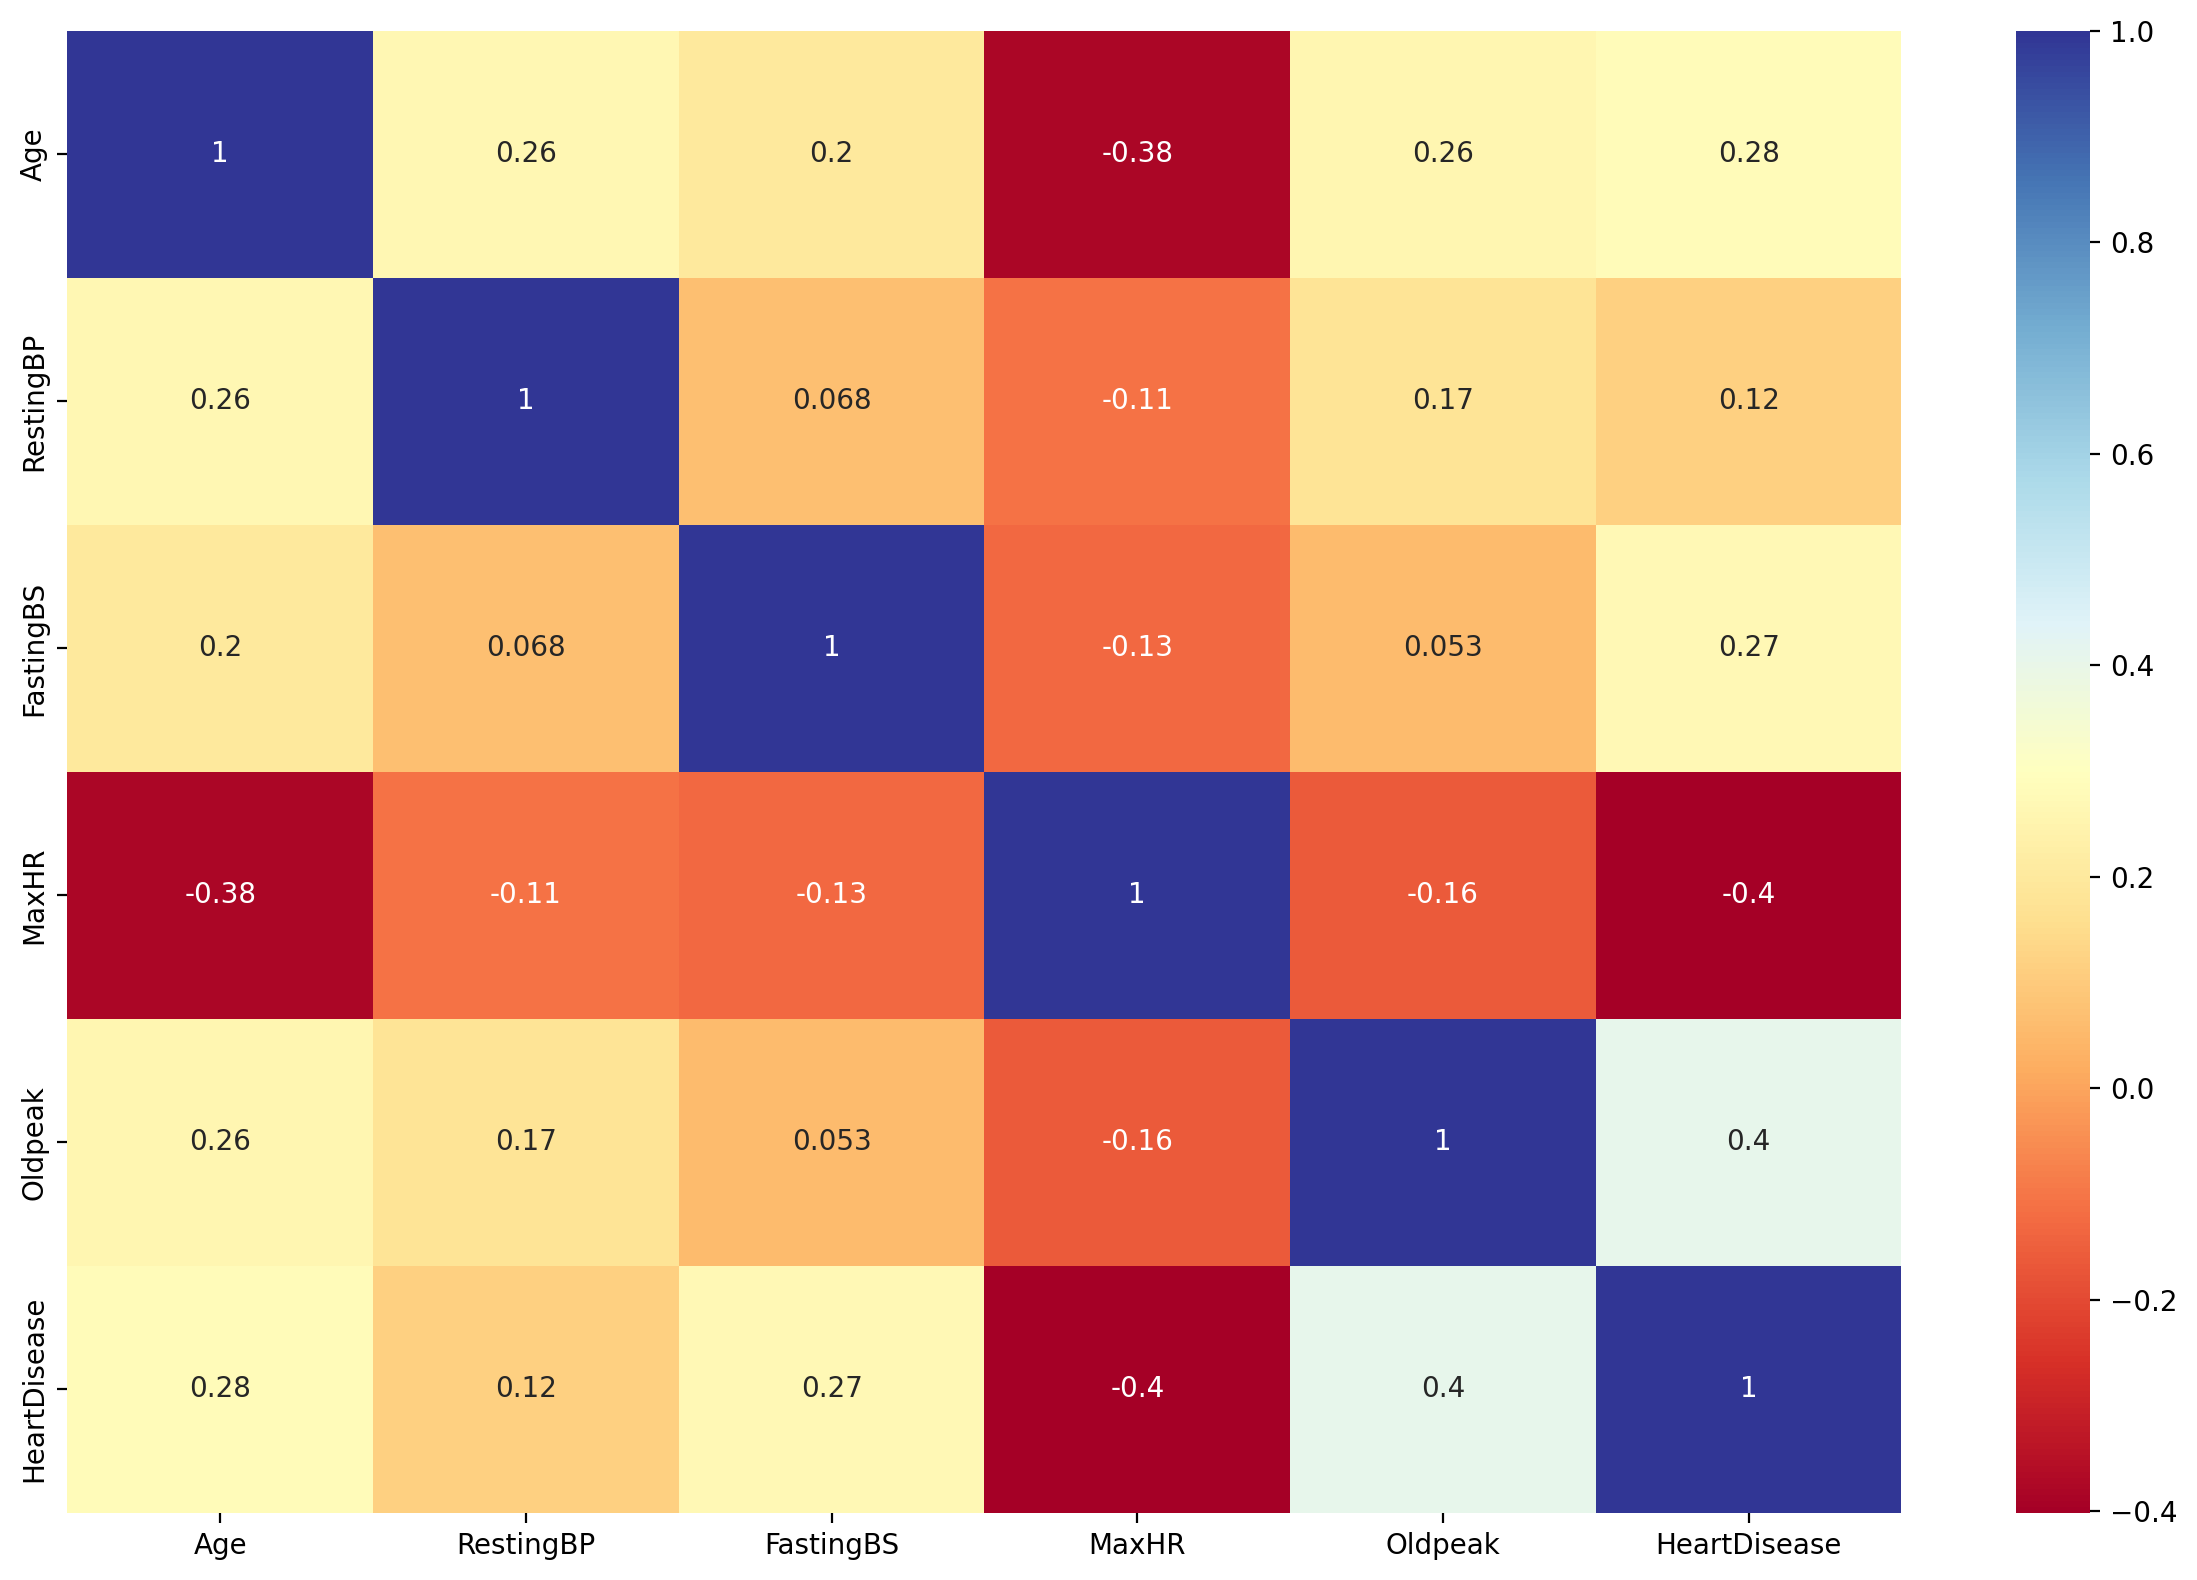

In [10]:
numeric_df = df.select_dtypes(include='number')

fig = plt.figure(figsize=(12,8),dpi=200)
sns.heatmap(data=numeric_df.corr(),annot=True,cmap='RdYlBu')
plt.tight_layout()
plt.savefig("correlation_matrix.png", dpi = 300)

## Arguments ##
Based on the EDA above, we have identified 5 key arguments to substantiate further explorations:
- Individuals who are older and have higher resting blood pressure have a higher risk of heart disease.
- Individuals who are older and have lower maximum heart rates have a higher risk of heart disease.
- Those with a typical angina have a higher risk for heart disease.
- Those that are older and have a higher old peak slope have a higher risk for heart disease.
- Individuals who exhibit ExerciseAngina have a higher risk for heart disease across both sexes and all age groups.


#### 1. Sex vs Heart Disease

In [11]:
df_counts = df.groupby(['Sex', 'HeartDisease']).size().reset_index(name='Count')

color_discrete_map = {0: '#1f78b4', 1: '#ff7f0e'}

fig = px.bar(df_counts, x='Sex', y='Count', color='HeartDisease', title='Heart Disease by Gender',
             labels={'Sex': 'Gender', 'HeartDisease': 'Heart Disease'},
             color_discrete_map=color_discrete_map,
             barmode='stack')

fig.show()

#### 2. RestingBP, Age, and HeartDisease ####

In [12]:
selector = alt.selection_point(fields=['Age'], empty=True)

main = alt.Chart(df).properties(
    width=250,
    height=250
).add_params(selector).mark_bar().encode(
    x=alt.X('Age:Q', title='Age'),
    y=alt.Y('count():Q', title='Frequency'),
    color=alt.condition(
        selector,
        alt.Color("HeartDisease:N",
                  scale=alt.Scale(scheme='category10')),
        alt.value('lightgray')
    )
)

sub = alt.Chart(df).transform_filter(
    selector
).transform_aggregate(
    Frequency='count():Q',
    groupby=['RestingBP', 'HeartDisease']
).mark_bar().encode(
    x=alt.X('RestingBP:Q', title='Resting Blood Pressure'),
    y=alt.Y('Frequency:Q', title='Frequency'),
    color=alt.Color('HeartDisease:N', scale=alt.Scale(scheme='category10'), title='Heart Disease')
).properties(
    title='Heart Disease by Age and Resting Blood Pressure'
)

main | sub

alt.HConcatChart(...)

The above plot is 2 combined bar charts to show the distribution of resting blood pressure for each age group. Upon selecting a bar for age on the left plot, the right plot will display a distribution of the resting blood pressure for that age group, with the bars being stacked to observe the presence of heart disease. The contrasting colors for the presence of heart disease (blue for 0; orange for 1) makes the difference amongst distributions immediately visible. We can see that those who are older tend to have heart disease and within each age group, those with higher blood pressure have heart disease.

#### 3. MaxHR, Age, and HeartDisease ####

In [13]:
fig = px.scatter(df, x='Age', y='MaxHR', color='HeartDisease',
                 color_continuous_scale=['blue', 'orange'], title='Heart Disease by Age vs. MaxHR',
                 labels={'Age': 'Age', 'MaxHR': 'MaxHR', 'HeartDisease': 'Heart Disease'},
                 hover_data={'Age': True, 'MaxHR': True, 'HeartDisease': True})

fig.update_traces(marker=dict(size=8),
                  selector=dict(mode='markers+text', textfont=dict(family='Arial', size=12)))

fig.show()

We also explored the relationship between Age and MaxHR as the correlation matrix found the variables to be correlated and we visually want to see how HeartDisease plays into this dynamic. The plot is an interactive scatter plot with color indicating the presence of heart disease. Hovering over the data points will provide the exact maximum heart rate and the overall plot shows the negative correlation between Age and MaxHR, intuitively confirming that people’s heart rates will reduce as they get older. The scatter points also show a higher concentration of yellow dots as age increases and MaxHR decreases, indicating that heart disease is more prevalent in older individuals with lower maximum heart rates.

#### 4. Oldpeak, Age, and HeartDisease ####

In [14]:
interval = alt.selection_interval()

scatter = alt.Chart(df).mark_point().encode(
    x='Age',
    y='Oldpeak',
    color=alt.condition(interval, 'HeartDisease', alt.value('lightgray'))
).add_params(
    interval
).properties(
    title = 'Heart Disease by Age vs. Oldpeak'
)

hist = alt.Chart(df).mark_bar().encode(
    x='count(HeartDisease):Q',
    y='HeartDisease:N',
    color='HeartDisease:N'
).transform_filter(
    interval
)

scatter & hist

alt.VConcatChart(...)

The above plot is a combined scatter and bar plot to explain the relationship between Oldpeak and HeartDisease. It uses selection and upon selecting a range in the top chart, we can see the count of people with heart disease in the bottom chart, for a given range of Oldpeak values. Oldpeak is the most correlated with heart disease and we can see that as we select values for Oldpeak higher than 0, the count of people with heart disease is increasing.

#### 5. ChestPainType and HeartDisease ####

In [15]:
bars = alt.Chart(df).mark_bar().encode(
    x=alt.X('ChestPainType:N', title='Chest Pain Type'),
    y=alt.Y('count(HeartDisease):Q', title='Count'),
    color=alt.Color('HeartDisease:N', scale=alt.Scale(scheme='category10'), title='Heart Disease'),
    tooltip=['ChestPainType:N', 'count(HeartDisease):Q']
).properties(
    width=300,
    height=300,
    title = 'Heart Disease by Chest Pain Type'
)

bars

alt.Chart(...)

We also wanted to see the variation of heart disease with different chest pain types with a simple stacked bar plot. Most cases are asymptomatic and hovering over the chart will reveal the exact count of people with or without heart disease. The results are also connected the number of entries per chest pain type, but the separation of the stack is interesting to visualize and  For example, although there are fewest of ChestPainType TA, the split is almost 50/50, which is important for our analysis and can be used later to make compelling inferences.

#### 6. ExerciseAngina, MaxHR and HeartDisease by Gender ####

In [16]:
scatterplot = alt.Chart(df).mark_circle().encode(
    y=alt.Y('ExerciseAngina:N', title='Exercise Angina'),
    x=alt.X('MaxHR:Q', title='Max Heart Rate'),
    color=alt.Color('HeartDisease:N', scale=alt.Scale(scheme='category10'), title='Heart Disease'),
    tooltip=['ExerciseAngina', 'MaxHR', 'HeartDisease'],
    ).properties(
    width=400,
    height=200
)

age_slider = alt.binding_range(min=30, max=60, step=1, name='Age:')
select_age = alt.selection_point(name='Age', fields=['Age'], bind=age_slider)

filtered_scatterplot = scatterplot.add_params(select_age).transform_filter(select_age)

male_scatterplot = filtered_scatterplot.transform_filter(alt.datum.Sex == 'M')
female_scatterplot = filtered_scatterplot.transform_filter(alt.datum.Sex == 'F')

male_scatterplot = male_scatterplot.properties(title='Male')
female_scatterplot = female_scatterplot.properties(title='Female')

combined_scatterplot = alt.hconcat(male_scatterplot, female_scatterplot).resolve_scale(x='shared')

combined_scatterplot = combined_scatterplot.properties(
    title='ExerciseAngina vs. MaxHR for Male and Female'
)

scatterplot_viewer = combined_scatterplot
scatterplot_viewer

alt.HConcatChart(...)

The variable ExerciseAngina is also one of heavy interest. It indiciates whether chest pain occurs during exercise specifically, and can thus also be compared to heart rate. Hence, this plot explores if cardiovascular disease was exercise-based for this dataset and also separates for gender to see if there is any relevance. The Altair plot shows a combined chart to compare between presence of ExerciseAngina and the distribution of the heart rate values for each age for males vs. females. Interactively, the slider controls for the specific age and we can see the differences in the scatter plot for each gender, with the points being color-coded orange for the presence of heart disease and blue for the absence. The visualization reveals that in all age groups, exercise angina did associate with heart disease prevalence across heart rates. Yet, where there was no exercise induced angina, there was still prevalence of heart disease. Exercised induced angina patients also did not show a correlation with max heart rates across most ages, indicating that the angina presence did not have an effect on heart rate variable. The trend of higher heart disease in older ages regardless was also seen as well.

In [17]:
fig = px.histogram(df, x='MaxHR', color='ST_Slope', nbins=20,
                   labels={'ST_Slope': 'ST Slope', 'MaxHR': 'Max Heart Rate'},
                   title='Distribution of Max Heart Rate by ST Slope',
                   color_discrete_map={'0': 'orange', '1': 'yellow', '2': 'blue'})

# Show the histograms
fig.show()

We also wanted to test the impact of ST_Slope on the Max Heart Rate through a simple stacked histogram on Plotly, laden with different colors to indicate the various different slope sizes of Upward, Downward, and Flat, all put into the range of the Max HR. A upward ST_Slope should lead to less of a MaxHR, but the downward ST_Slope would lead to more of a MaxHR rate because of the overall trends in HR. The colors are made in order to check the difference of the stack, so that a difference can be seen between the blue, red, and green graphs accordingly. The results will also connect to the number of overall ranges for MaxHR per ST_Slope.

#### Machine Learning ####

In [18]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

# Convert categorical variables into numerical format
del df['FastingBS']
df = pd.get_dummies(df, columns=['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], drop_first=True)

# Split data into X and Y
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

# Split into testing and training datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Random Forest

Accuracy: 0.8478260869565217
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.86      0.82        72
           1       0.90      0.84      0.87       112

    accuracy                           0.85       184
   macro avg       0.84      0.85      0.84       184
weighted avg       0.85      0.85      0.85       184



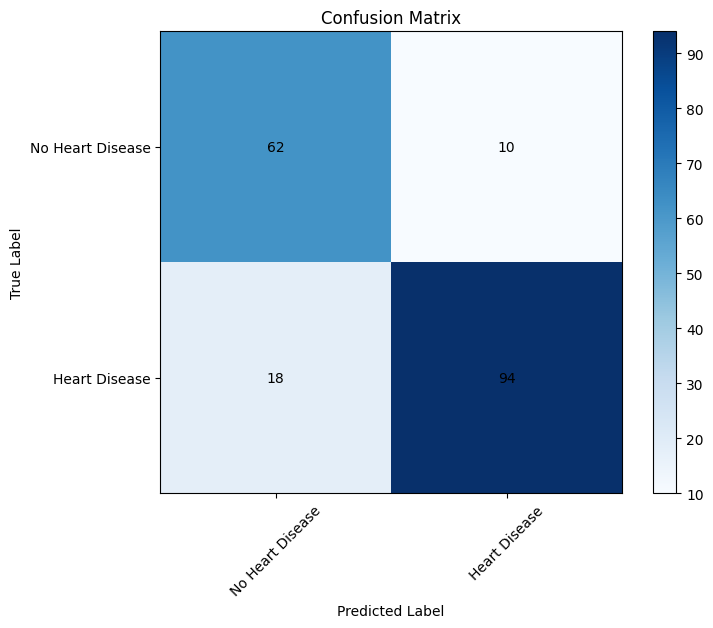

In [19]:
# Create a random forest classifier
rf = RandomForestClassifier(n_estimators=300, random_state=42)

# Fit model
rf.fit(X_train, y_train)

# Make predictions
rf_y_pred = rf.predict(X_test)

# Evaluate random forest model
rf_accuracy = accuracy_score(y_test, rf_y_pred)
confusion = confusion_matrix(y_test, rf_y_pred)
class_report = classification_report(y_test, rf_y_pred)

print("Accuracy:", rf_accuracy)
print("Classification Report:\n", class_report)

# Create a custom confusion matrix plot
plt.figure(figsize=(8, 6))
plt.imshow(confusion, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(['No Heart Disease', 'Heart Disease']))
plt.xticks(tick_marks, ['No Heart Disease', 'Heart Disease'], rotation=45)
plt.yticks(tick_marks, ['No Heart Disease', 'Heart Disease'])

# Display the values on the plot
for i in range(len(['No Heart Disease', 'Heart Disease'])):
    for j in range(len(['No Heart Disease', 'Heart Disease'])):
        plt.text(j, i, str(confusion[i, j]), ha='center', va='center', color='black')

plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

The accuracy of the MLP Classification model is 85%. Precision for predicting no heart disease is 78% and the precision for prediciton heart disease is 90%.

Logistic Regression

Accuracy: 0.8586956521739131
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.89      0.83        72
           1       0.92      0.84      0.88       112

    accuracy                           0.86       184
   macro avg       0.85      0.86      0.85       184
weighted avg       0.87      0.86      0.86       184



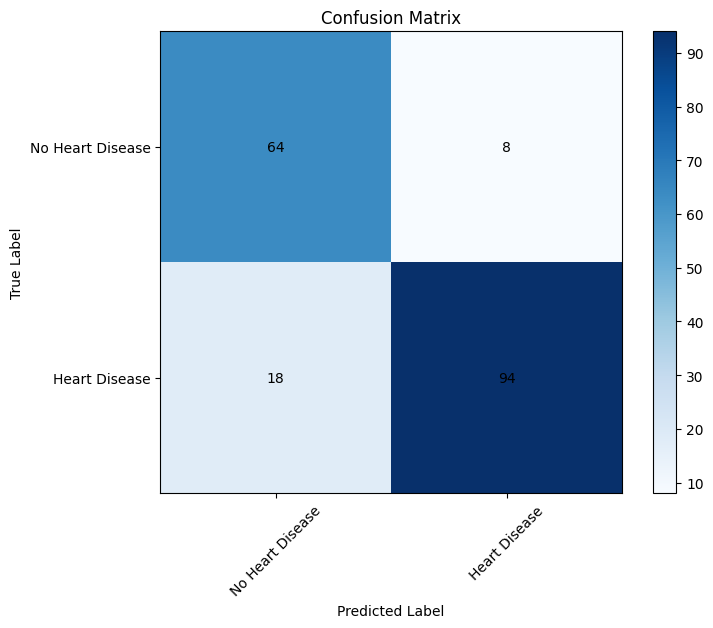

In [20]:
# create logistic regression model
lr = LogisticRegression(max_iter=2000)

# fit the model
lr.fit(X_train, y_train)

# make predictions
lr_y_pred = lr.predict(X_test)

# evaluate the model
lr_accuracy = accuracy_score(y_test, lr_y_pred)
confusion = confusion_matrix(y_test, lr_y_pred)
class_report = classification_report(y_test, lr_y_pred)

print("Accuracy:", lr_accuracy)
print("Classification Report:\n", class_report)

# Create a custom confusion matrix plot
plt.figure(figsize=(8, 6))
plt.imshow(confusion, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(['No Heart Disease', 'Heart Disease']))
plt.xticks(tick_marks, ['No Heart Disease', 'Heart Disease'], rotation=45)
plt.yticks(tick_marks, ['No Heart Disease', 'Heart Disease'])

# Display the values on the plot
for i in range(len(['No Heart Disease', 'Heart Disease'])):
    for j in range(len(['No Heart Disease', 'Heart Disease'])):
        plt.text(j, i, str(confusion[i, j]), ha='center', va='center', color='black')

plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

The accuracy of the Logistic Regression model is 86%. Precision for predicting no heart disease is 78% and the precision for prediciton heart disease is 92%.

MLP Classification

Accuracy: 0.8641304347826086
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.90      0.84        72
           1       0.93      0.84      0.88       112

    accuracy                           0.86       184
   macro avg       0.86      0.87      0.86       184
weighted avg       0.87      0.86      0.87       184



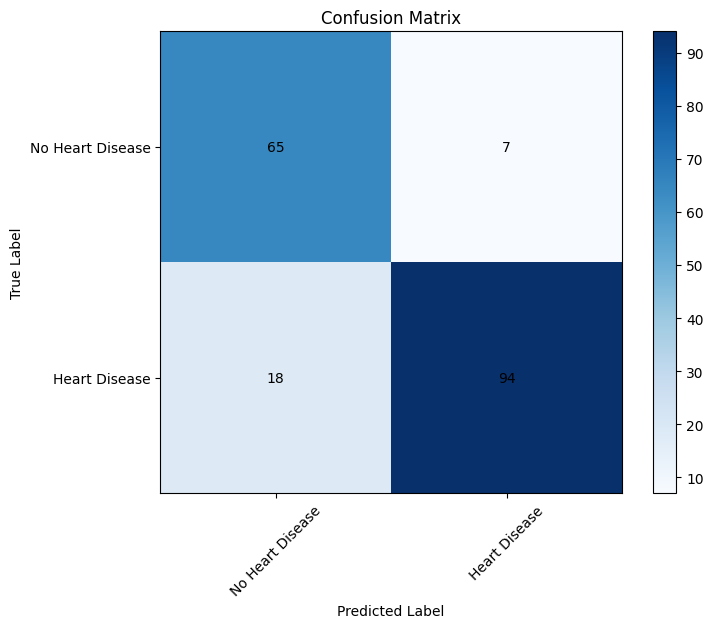

In [21]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create and train the MLP classifier
mlp = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=2000, learning_rate_init=0.0005, random_state=42)
mlp.fit(X_train, y_train)

# Make predictions
mlp_y_pred = mlp.predict(X_test)

# Evaluate the model
mlp_accuracy = accuracy_score(y_test, mlp_y_pred)
confusion = confusion_matrix(y_test, mlp_y_pred)
classification_rep = classification_report(y_test, mlp_y_pred)

print("Accuracy:", mlp_accuracy)
print("Classification Report:\n", classification_rep)

# Create a custom confusion matrix plot
plt.figure(figsize=(8, 6))
plt.imshow(confusion, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(['No Heart Disease', 'Heart Disease']))
plt.xticks(tick_marks, ['No Heart Disease', 'Heart Disease'], rotation=45)
plt.yticks(tick_marks, ['No Heart Disease', 'Heart Disease'])

# Display the values on the plot
for i in range(len(['No Heart Disease', 'Heart Disease'])):
    for j in range(len(['No Heart Disease', 'Heart Disease'])):
        plt.text(j, i, str(confusion[i, j]), ha='center', va='center', color='black')

plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

The accuracy of the MLP Classification model is 86%. Precision for predicting no heart disease is 78% and the precision for prediciton heart disease is 93%.Since this model has the highest accuracy and precision, it can be concluded that MLP Classification is the best model to predict whether an individual has heart disease.


ROC Curves for all Three Models

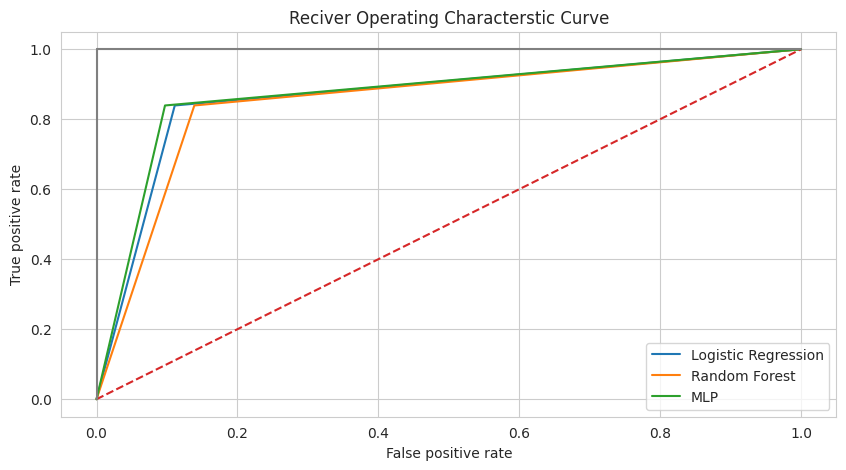

In [22]:
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report


lr_false_positive_rate,lr_true_positive_rate,lr_threshold = roc_curve(y_test,lr_y_pred)
rf_false_positive_rate,rf_true_positive_rate,rf_threshold = roc_curve(y_test,rf_y_pred)
mlp_false_positive_rate,mlp_true_positive_rate,mlp_threshold = roc_curve(y_test,mlp_y_pred)

sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
plt.title('Reciver Operating Characterstic Curve')
plt.plot(lr_false_positive_rate,lr_true_positive_rate,label='Logistic Regression')
plt.plot(rf_false_positive_rate,rf_true_positive_rate,label='Random Forest')
plt.plot(mlp_false_positive_rate,mlp_true_positive_rate,label='MLP')

plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.show()

The ROC curves above demonstrate that MLP is the best model.

Comparision of Accuracy

In [23]:
model_ev = pd.DataFrame({'Model': ['Logistic Regression','Random Forest','MLP'], 'Accuracy': [lr_accuracy*100,
                    rf_accuracy*100,mlp_accuracy*100]})
model_ev

,Model,Accuracy
0,Logistic Regression,85.869565
1,Random Forest,84.782609
2,MLP,86.413043


---


Overall: Since MLP model has the highest accuracy and precision, it can be concluded that MLP Classification is the best model to predict whether an individual has heart disease.


### Feature Importance

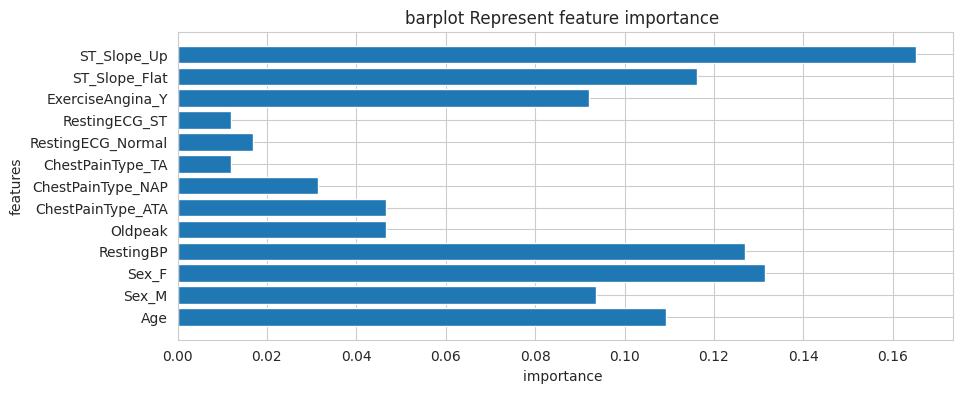

In [24]:
imp_feature = pd.DataFrame({'Feature': ['Age', 'Sex_M', 'Sex_F', 'RestingBP', 'Oldpeak', 'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA',
       'RestingECG_Normal', 'RestingECG_ST', 'ExerciseAngina_Y', 'ST_Slope_Flat', 'ST_Slope_Up'], 'Importance': rf.feature_importances_})
plt.figure(figsize=(10,4))
plt.title("barplot Represent feature importance ")
plt.xlabel("importance ")
plt.ylabel("features")
plt.barh(imp_feature['Feature'],imp_feature['Importance'])
plt.show()

The graph above ranks the feature importance using the random forest model, as MLP does not allow for this ranking. Althrough not the best model, the ranks above do provide more information. ST_Slope, RestingBP, Age, Sex, and ExcersiseAngina prove to be important attributes. This confirms our above analyis into different attributes.

---


**Overall Conclusion:** Age, Resting BP, Max HR, Old peak, Sex, ChestPainType, RestingECG, exercise angina, and ST slope can predict whether an individual has heart disease.
